Shuffling Code Example to Make 100,000 Shuffles

In [1]:
import random
import pandas as pd
import os
import protfasta
import seaborn as sns
import matplotlib.pyplot as plt
# Miscellaneous Packages
from statannot import add_stat_annotation
from sparrow import Protein
from sparrow.patterning import iwd

sequence = "MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLPNNT"

def shuffle_sequence(seq):
    seq_list = list(seq)
    random.shuffle(seq_list)
    return ''.join(seq_list)

# Generate shuffled sequences
shuffled_sequences = [shuffle_sequence(sequence) for _ in range(100000)]

# Create a dataframe to store the shuffled sequences
df = pd.DataFrame({'Sequence': shuffled_sequences})

# Add a column for the identifiers (numbers)
df['ID'] = range(1, len(df) + 1)

# Drop duplicates based on the 'Sequence' column
df = df.drop_duplicates(subset='Sequence')

# Format the dataframe to FASTA format
df['Formatted'] = '>' + df['ID'].astype(str) + '\n' + df['Sequence']

# Save the dataframe as a CSV file
df[['Formatted']].to_csv('./Analysis/shuffled_sequences100example.fasta', sep='\t', index=False, header=False, line_terminator='\n', quoting=3, escapechar='\\')

# Get the count of sequences after removing duplicates
num_sequences = len(df)

print("Shuffled sequences saved successfully!")
print("Number of sequences generated: ", num_sequences)

Shuffled sequences saved successfully!
Number of sequences generated:  100000


In [2]:
current_filepath = os.getcwd()
shuffled = './Analysis/shuffled_sequences100example.fasta'.format(current_filepath)
seqs = protfasta.read_fasta(shuffled)

In [3]:
Pos_Weighted_Shuffled = []

for k in seqs:
    
    local_seq = seqs[k]
    
    patterning = Protein(local_seq).compute_iwd_charged_weighted('+')
    
    Pos_Weighted_Shuffled.append(patterning)
    
    
#print(Pos_Weighted)

df_shuffled = pd.DataFrame(seqs.items(), columns=['Replicate', 'String'])

df_shuffled['IWD+'] = Pos_Weighted_Shuffled

df_shuffled

,Replicate,String,IWD+
0,1\,QRQNTGNALTDQRGIPRFSSEKTPPRSSGSQRGNQDNGNGSNPGNARMP,0.069170
1,2\,FDTPDSRRPSQGNRAQKNALQPSGQRGPNTNMSSRNGPSQNRGTIGNEG,0.127250
2,3\,RDRMNASNSNGTTPNDQISRGPARPTGQSGGQLRRQKSNGPNGNSQFPE,0.277434
3,4\,NKSNSANTQQPRSQNIPNDPPSGSGNADFGGNRRGGRQMPSLGQERTRT,0.220213
4,5\,NQNSGSNTSNRFPQSQIPTARDDGSPGGRKAQTQRRPMNPSGEGNRLGN,0.228139
...,...,...,...
99995,99996\,ERNPRGRPRDGGASQTRLAMNQNKQDGGGQNSTGISPNTFSRSNQPNPS,0.176572
99996,99997\,QSSKRSLRSNRNGEPTQATFAPQMNSPSNRNPNDQIGPGGNGRGGDTRQ,0.262266
99997,99998\,RRDATPNSNMFGGIELADRPKNSQGSQTPNNSGTQRNPGSRQSGPGNQR,0.077988
99998,99999\,LFQRNDNPRPIQGSTETGRSNNKASSQTPMNSRGNGRGQPSARGDPGQN,0.053712


In [4]:
# Compute IWD+ values
Pos_Weighted_Shuffled = [Protein(seq).compute_iwd_charged_weighted('+') for seq in seqs.values()]

# Create a DataFrame with 'Replicate' and 'String' columns
df_shuffled = pd.DataFrame(seqs.items(), columns=['Replicate', 'String'])

# Assign the computed IWD+ values to the 'IWD+' column
df_shuffled['IWD+'] = Pos_Weighted_Shuffled

df_shuffled

,Replicate,String,IWD+
0,1\,QRQNTGNALTDQRGIPRFSSEKTPPRSSGSQRGNQDNGNGSNPGNARMP,0.069170
1,2\,FDTPDSRRPSQGNRAQKNALQPSGQRGPNTNMSSRNGPSQNRGTIGNEG,0.127250
2,3\,RDRMNASNSNGTTPNDQISRGPARPTGQSGGQLRRQKSNGPNGNSQFPE,0.277434
3,4\,NKSNSANTQQPRSQNIPNDPPSGSGNADFGGNRRGGRQMPSLGQERTRT,0.220213
4,5\,NQNSGSNTSNRFPQSQIPTARDDGSPGGRKAQTQRRPMNPSGEGNRLGN,0.228139
...,...,...,...
99995,99996\,ERNPRGRPRDGGASQTRLAMNQNKQDGGGQNSTGISPNTFSRSNQPNPS,0.176572
99996,99997\,QSSKRSLRSNRNGEPTQATFAPQMNSPSNRNPNDQIGPGGNGRGGDTRQ,0.262266
99997,99998\,RRDATPNSNMFGGIELADRPKNSQGSQTPNNSGTQRNPGSRQSGPGNQR,0.077988
99998,99999\,LFQRNDNPRPIQGSTETGRSNNKASSQTPMNSRGNGRGQPSARGDPGQN,0.053712


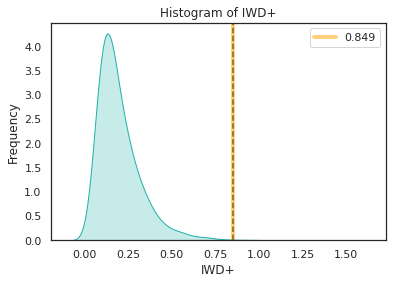

In [5]:
import numpy as np

sns.set_theme(style='white')

# Plot histogram
sns.kdeplot(df_shuffled['IWD+'], shade=True, color='lightseagreen', bw = 0.3)

# Calculate the 98th percentile value
percentile_99 = np.percentile(df_shuffled['IWD+'], 99.75)

# Add the vertical line at the 98th percentile
plt.axvline(percentile_99, color='k', linestyle='--')
plt.axvline(percentile_99, color='orange', alpha = .5, 
            linestyle='solid', linewidth = 4, label = '%.3f'%percentile_99)

# Set the title and labels
plt.title('Histogram of IWD+')
plt.xlabel('IWD+')
plt.ylabel('Frequency')
plt.legend(loc=0)

# Show the plot
plt.show()